>![image](jmulogo.png)
>
> # Math 248 Computers and Numerical Algorithms
> # Hala Nelson
> # Week 6: Singular Value Decomposition in Action

# In this notebook we will think of matrices as linear transformations that act on vectors in space, and on space itself. Let's use the singular value decomposition to explore the action of a matrix $A$ on space. We will work with two dimensional matrices because they are easy to visualize.

1. First we will explore the action of $A$ on the right singular vectors $v_1$ and $v_2$. We see that these get sent to multiples of the left singular vectors $u_1$ and $u_2$.
2. Second we will explore the action of $A$ on the standard unit vectors $e_1$ and $e_2$. Here we will also see how the unit square gets transformed to a parallegram.
3. Third we will explore the action of $A$ on a general vector $x$. This will help us understand the matrices $U$ and $V$ as rotations or reflections in space.
4. Fourth we will explore the action of $A$ on the unit circle. We will see that $A$ transforms the unit circle to an ellipse, with its principal axes along the left singular vectors $u$'s, and the lengths of its principal axes are the $\sigma$'s. Since the singular values $\sigma$'s are ordered from largest to smallest, then $u_1$ defines the direction with the most variation, and $u_2$ defines the direction with the second most variation, and so on.   

# First we explore the action of A on the special vectors which are the columns of V:

$$A=\begin{pmatrix}1&5\\-1&2\end{pmatrix}$$

The singular value decomposition of A is
$$A=U\Sigma V^t=\begin{pmatrix} 0.93788501 & 0.34694625\\ 0.34694625 & -0.93788501 \end{pmatrix}\begin{pmatrix} 5.41565478 & 0 \\ 0 & 1.29254915 \end{pmatrix}\begin{pmatrix} 0.10911677 & 0.99402894 \\ 0.99402894 & -0.10911677\end{pmatrix}$$ is equivalent to $$AV=U\Sigma,$$ which means that the action of $A$ on the orthonormal columns of $V$ is the same as stretching/squeezing the columns of $U$ by the singular values. That is, $$Av_1=\sigma_1u_1$$ and $$Av_2=\sigma_2u_2$$

# The following code shows that $A$ sends the special vectors $v$'s to multiples of the other special vectors $u$'s

U=
 [[ 0.93788501  0.34694625]
 [ 0.34694625 -0.93788501]]
sigma=
 [5.41565478 1.29254915]
Sigma=
 [[5.41565478 0.        ]
 [0.         1.29254915]]
Vt=
 [[ 0.10911677  0.99402894]
 [ 0.99402894 -0.10911677]]
U.Sigma.Vt=
 [[ 1.  5.]
 [-1.  2.]]
A=
 [[ 1  5]
 [-1  2]]


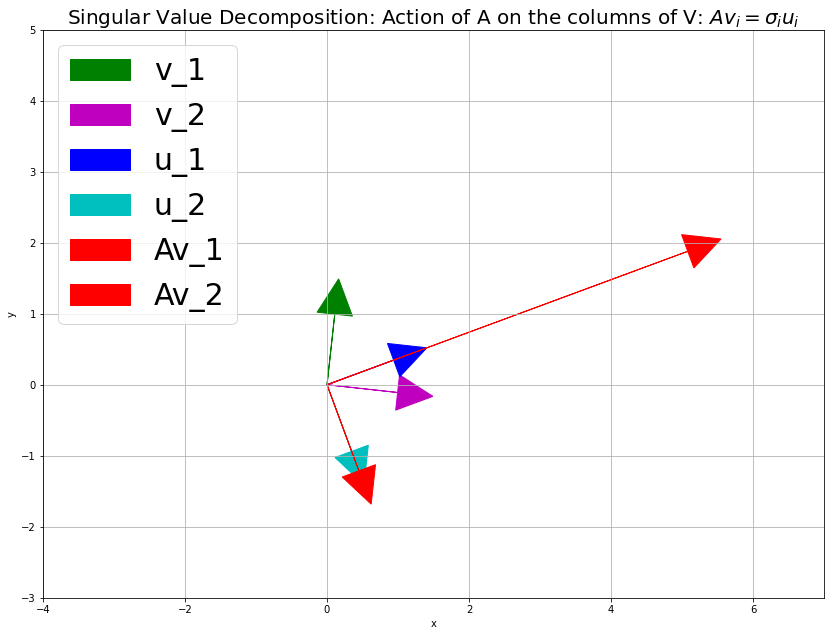

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# define A as a numpy array
A=np.array([[1,5],[-1,2]])


# perform SVD on A
U,sigma,Vt=np.linalg.svd(A)
print("U=\n",U)
print("sigma=\n",sigma)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.diag(sigma)
print("Sigma=\n",Sigma)
print("Vt=\n",Vt)

# Check whether you can recover A
print('U.Sigma.Vt=\n',U.dot(Sigma.dot(Vt)))
print('A=\n',A)

# These are the columns of U
u_1=U[:,0]
u_2=U[:,1]

# These are the columns of V (not Vt, I transpose Vt first)
V=Vt.T
v_1=V[:,0]
v_2=V[:,1]

# This is A acting on the columns of V
Av_1=A.dot(v_1)
Av_2=A.dot(v_2)

# Plot the vectors using arrow in matplolib.pyplot.axes
# set the figure and labels
plt.figure(figsize=(14,14))
vec= plt.axes()
plt.axis('scaled') # the scale on the x-axis is the same as the y-axis
plt.xlim(-4,7)
plt.ylim(-3,5)
plt.title('Singular Value Decomposition: Action of A on the columns of V: $Av_i=\sigma_i u_i$', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

# plot the vectors as arrows
arrow_v_1=vec.arrow(0, 0, *v_1, head_width=0.5, head_length=0.5, color='g', label='v_1')
arrow_v_2=vec.arrow(0, 0, *v_2, head_width=0.5, head_length=0.5, color='m',label='v_2')
arrow_u_1=vec.arrow(0, 0, *u_1, head_width=0.5, head_length=0.5, color='b', label='u_1')
arrow_u_2=vec.arrow(0, 0, *u_2, head_width=0.5, head_length=0.5, color='c', label='u_2')
arrow_Av_1=vec.arrow(0, 0, *Av_1,head_width=0.5, head_length=0.5, color='r', label='Av_1')
arrow_Av_2=vec.arrow(0, 0, *Av_2,head_width=0.5, head_length=0.5, color='r', label='Av_2')

# show the grid
plt.grid()

# set the legend
plt.legend([arrow_v_1,arrow_v_2,arrow_u_1,arrow_u_2,arrow_Av_1,arrow_Av_2], 
           ['v_1','v_2','u_1','u_2','Av_1','Av_2'],loc=2, prop={'size': 30})

# Second we use the SVD to explore the action of a matrix on the standard unit vectors in 2D space.

$$A=U\Sigma V^t$$

$U$ and $V$ could be rotation or reflection matrices. 

The transpose of a rotation matrix is a rotation in the opposite direction. So if a matrix rotates clockwise its transpose rotates counterclockwise.

A rotation matrix clockwise by an angle $\theta$ is: 
$$\begin{pmatrix}\cos\theta&\sin\theta\\-\sin\theta &\cos\theta\end{pmatrix}$$

A rotation matrix counterclockwise by an angle $\theta$ is the transpose of the above matrix:
$$\begin{pmatrix}\cos\theta&-\sin\theta\\\sin\theta &\cos\theta\end{pmatrix}$$

A reflection matrix about a line $L$ making an angle $\theta$ with the $x$-axis is:
$$\begin{pmatrix}\cos2\theta&\sin2\theta\\\sin2\theta &-\cos2\theta\end{pmatrix}$$

> Note: The equation of $L$ is $y=(\tan\theta) x$ since it has slope $\tan\theta$ and passes through the origin.

The determinant of a rotation matrix is $1$ and the determinant of the reflection matrix is $-1$. Notice that both rotations and reflections have orthonormal rows and columns. Also, their inverse is their transpose.

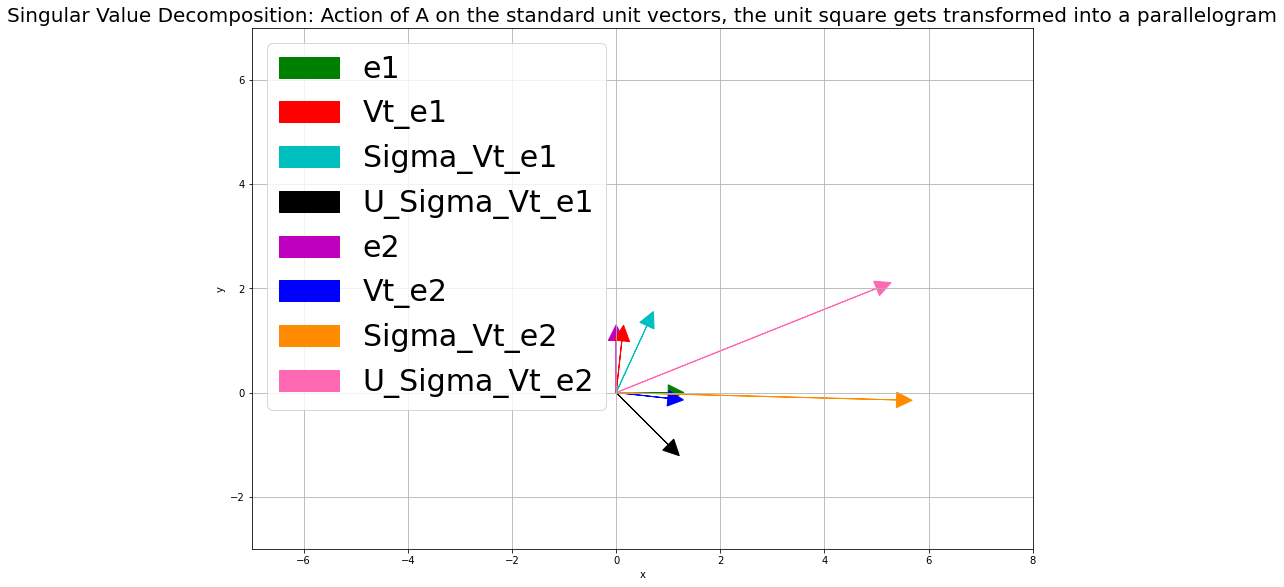

In [3]:
e1=[1,0]
e2=[0,1]

Vt_e1=(Vt).dot(e1)
Vt_e2=(Vt).dot(e2)
Sigma_Vt_e1=Sigma.dot(Vt_e1)
Sigma_Vt_e2=Sigma.dot(Vt_e2)
U_Sigma_Vt_e1=U.dot(Sigma_Vt_e1)
U_Sigma_Vt_e2=U.dot(Sigma_Vt_e2)

# Plot the vectors using arrow in matplolib.pyplot.axes
# set the figure and labels
plt.figure(figsize=(14,14))
vec= plt.axes()
plt.axis('scaled') # the scale on the x-axis is the same as the y-axis
plt.xlim(-7,8)
plt.ylim(-3,7)
plt.title('Singular Value Decomposition: Action of A on the standard unit vectors, the unit square gets transformed into a parallelogram',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

# plot the vectors as arrows
arrow_e1=vec.arrow(0, 0, *e1, head_width=0.3, head_length=0.3, color='g', label='e1')
arrow_e2=vec.arrow(0, 0, *e2, head_width=0.3, head_length=0.3, color='m',label='e2')
arrow_Vt_e1=vec.arrow(0, 0, *Vt_e1, head_width=0.3, head_length=0.3, color='r',label='Vt_e1')
arrow_Vt_e2=vec.arrow(0, 0, *Vt_e2, head_width=0.3, head_length=0.3, color='b',label='Vt_e2')
arrow_Sigma_Vt_e1=vec.arrow(0, 0, *Sigma_Vt_e1, head_width=0.3, head_length=0.3, color='c',label='Sigma_Vt_e1')
arrow_Sigma_Vt_e2=vec.arrow(0, 0, *Sigma_Vt_e2, head_width=0.3, head_length=0.3, color='darkorange',label='Sigma_Vt_e2')
arrow_U_Sigma_Vt_e1=vec.arrow(0, 0, *U_Sigma_Vt_e1, head_width=0.3, head_length=0.3, color='k',label='U_Sigma_Vt_e1')
arrow_U_Sigma_Vt_e2=vec.arrow(0, 0, *U_Sigma_Vt_e2, head_width=0.3, head_length=0.3, color='hotpink',label='U_Sigma_Vt_e2')

# show the grid
plt.grid()

# set the legend
plt.legend([arrow_e1,arrow_Vt_e1,arrow_Sigma_Vt_e1, arrow_U_Sigma_Vt_e1, arrow_e2,arrow_Vt_e2, 
            arrow_Sigma_Vt_e2, arrow_U_Sigma_Vt_e2], 
           ['e1','Vt_e1','Sigma_Vt_e1','U_Sigma_Vt_e1','e2','Vt_e2','Sigma_Vt_e2','U_Sigma_Vt_e2'],
           loc=2, prop={'size': 30})

# Third we explore the action of $A$ on a general vector $x$. This helps us understand the matrices $U$ and $V$ as reflections or rotations

A reflection matrix about a line $L$ making an angle $\theta$ with the $x$-axis is:
$$\begin{pmatrix}\cos2\theta&\sin2\theta\\\sin2\theta &-\cos2\theta\end{pmatrix}$$

The matrices $U$ and $V$ in the singular value decomposition of the above $A=U\Sigma V^t$ are both reflections.
1. Find the angles of the straight lines $L_U$ and $L_{V^t}$ that act as mirrors for these reflections.
2. Find the equations of the lines of reflection.
3. Use python to plot these lines.
4. On the same plot, plot a general vector $x$, $V^tx$, $\Sigma V^t x$, and $U\Sigma V^t x=Ax$ 

$$A=U\Sigma V^t=\begin{pmatrix} 0.93788501 &0.34694625\\0.34694625&-0.93788501\end{pmatrix}\begin{pmatrix}5.41565478&0\\0&1.29254915\end{pmatrix}\begin{pmatrix}0.10911677&0.99402894\\0.99402894&-0.10911677\end{pmatrix}$$

Equation of line along which Vt reflects is:
 y=0.8962347008436108x
Equation of line along which U reflects is:
 y=0.17903345403184898x


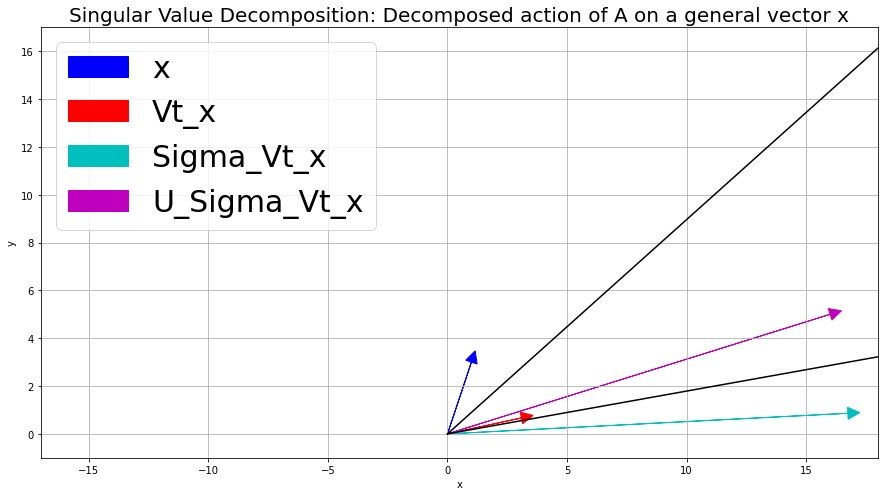

In [4]:
# choose a vector x
x=[1,3]

# apply V^t then Sigma then U to x
Vt_x=(Vt).dot(x)
Sigma_Vt_x=Sigma.dot(Vt_x)
U_Sigma_Vt_x=U.dot(Sigma_Vt_x)

# Calculate the slopes of the reflection lines: slope= tan(theta)=tan(0.5*cos^-1(R(0,0))) 
# where R is the reflection matrix
slope_L_Vt=np.tan(0.5*np.arccos(Vt[0,0]))
print(f'Equation of line along which Vt reflects is:\n y={slope_L_Vt}x')
slope_L_U=np.tan(0.5*np.arccos(U[0,0]))
print(f'Equation of line along which U reflects is:\n y={slope_L_U}x')

# The equation of the line is y=tan(theta)x. Discretize in order to plot the straightlines.
x_discrete = np.linspace(0,18,100)
y_L_Vt = slope_L_Vt*x_discrete
y_L_U = slope_L_U*x_discrete

# Plot the vectors using arrow in matplolib.pyplot.axes
# set the figure and labels
plt.figure(figsize=(15,15))
vec= plt.axes()
plt.axis('scaled') # the scale on the x-axis is the same as the y-axis
plt.xlim(-17,18)
plt.ylim(-1,17)
plt.title('Singular Value Decomposition: Decomposed action of A on a general vector x',fontsize=20)
plt.xlabel('x')
plt.ylabel('y')

# plot the straight lines
plt.plot(x_discrete, y_L_Vt, 'k')
plt.plot(x_discrete, y_L_U, 'k')

# show the grid
plt.grid()

# plot the vectors as arrows
arrow_x=vec.arrow(0, 0, *x, head_width=0.5, head_length=0.5, color='b', label='x')
arrow_Vt_x=vec.arrow(0, 0, *Vt_x, head_width=0.5, head_length=0.5, color='r',label='Vt_x')
arrow_Sigma_Vt_x=vec.arrow(0, 0, *Sigma_Vt_x, head_width=0.5, head_length=0.5, color='c',label='Sigma_Vt_x')
arrow_U_Sigma_Vt_x=vec.arrow(0, 0, *U_Sigma_Vt_x, head_width=0.5, head_length=0.5, color='m',label='U_Sigma_Vt_x')

# set the legend
plt.legend([arrow_x,arrow_Vt_x,arrow_Sigma_Vt_x, arrow_U_Sigma_Vt_x], 
           ['x','Vt_x','Sigma_Vt_x','U_Sigma_Vt_x'],loc=2, prop={'size': 30})

# Fourth we understand the action of the linear transformation A on the unit circle: It transforms the unit circle to an ellipse with principal axes along the $u$'s and lengths of the principal axes equal to the $\sigma$'s. Again, since matrices represent linear transformations, there is stretching of space, but no warping.

We can easily see the above action from the Sigular Value Decomposition.

The Polar Decomposition $$A=QS$$ is a very easy way that geometrically shows how a circle gets transformed into an ellipse.

[5.07926146 1.8789411 ] [ 0.44844508 -1.21226248]


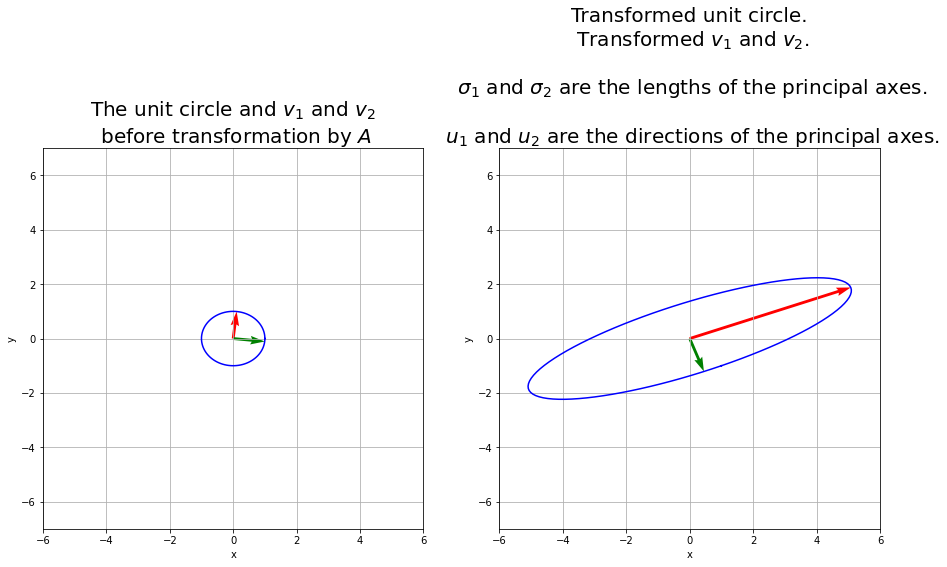

In [5]:
# set the figure and labels
fig, subs=plt.subplots(nrows=1, ncols=2, figsize=(15,7))
subs[0].grid()
subs[0].set_xlabel('x')
subs[0].set_ylabel('y')
subs[0].set_xlim(-6,6)
subs[0].set_ylim(-7,7)
subs[0].set_title('The unit circle and $v_1$ and $v_2$\n before transformation by $A$', fontsize=20)

subs[1].grid()
subs[1].set_xlabel('x')
subs[1].set_ylabel('y')
subs[1].set_xlim(-6,6)
subs[1].set_ylim(-7,7)
subs[1].set_title('''Transformed unit circle.\n Transformed $v_1$ and $v_2$.
\n $\sigma_1$ and $\sigma_2$ are the lengths of the principal axes.
\n $u_1$ and $u_2$ are the directions of the principal axes.''', fontsize=20)


# plot v_1 and v_2: I will use the quiver function instead of the arrow function
# The parameters passed to quiver are chosen so as the vector arrows have length= Euclidean length
subs[0].quiver(0,0,v_1[0],v_1[1],scale=1,scale_units='xy',angles='xy',color=['r'])  
subs[0].quiver(0,0,v_2[0],v_2[1],scale=1, scale_units='xy',angles='xy', color=['g']) 

print(Av_1,Av_2)
# plot Av_1=sigma_1 u_1 and Av_2=sigma_2 u_2
subs[1].quiver(0,0,Av_1[0],Av_1[1],scale=1,scale_units='xy',angles='xy',color=['r']) 
subs[1].quiver(0,0,Av_2[0],Av_2[1],scale=1,scale_units='xy',angles='xy',color=['g']) 

# plot the unit circle in the first subplot
t=np.linspace(0,2*np.pi,100)
x=np.cos(t)
y=np.sin(t)
subs[0].plot(x,y,'b')

# plot the tranformed unit circle in the second plot. 
# It becomes an ellipse with major and minor axes along the u's
Ax=A[0,0]*x+A[0,1]*y
Ay=A[1,0]*x+A[1,1]*y
subs[1].plot(Ax,Ay,'b')

# Make 4 subplots that show the above transformation in steps: First multiply the unit circle and the vectors $v_1$ and $v_2$ by $V^t$, then multiply that by $\Sigma$, finally multiply that by $U$.

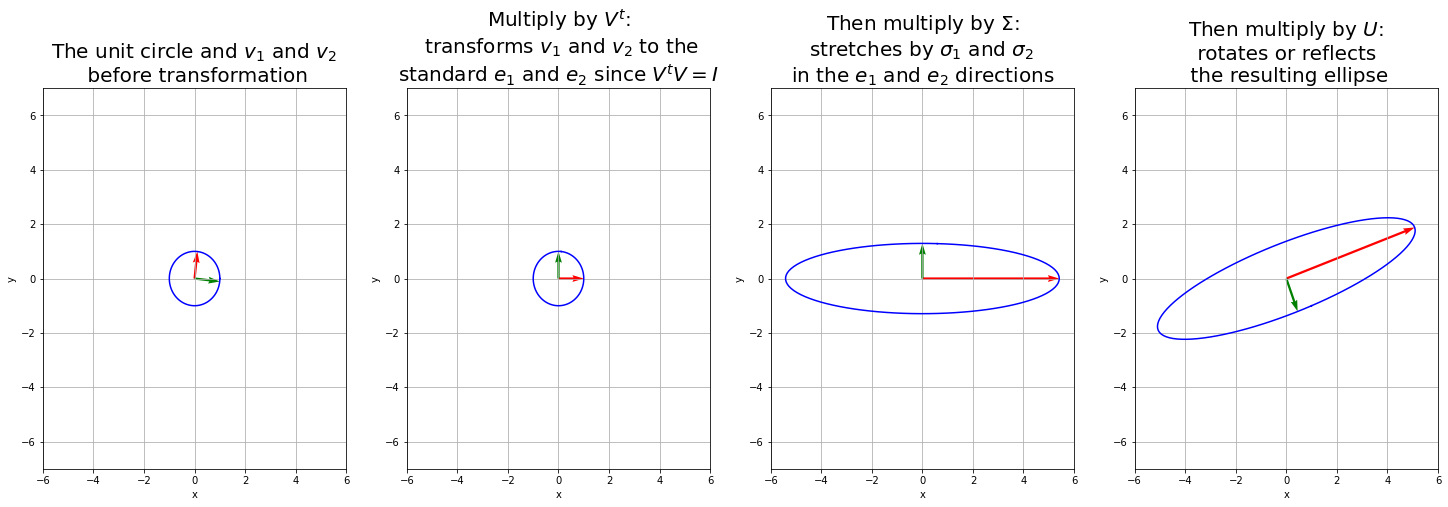

In [16]:
# define A as a numpy array
A=np.array([[1,5],[-1,2]])

# perform SVD on A
U,sigma,Vt=np.linalg.svd(A)
# store sigma in a diagonal matrix that has the same shape as A
Sigma=np.diag(sigma)

# These are the columns of U
u_1=U[:,0]
u_2=U[:,1]

# These are the columns of V (not Vt, I transpose Vt first)
V=Vt.T
v_1=V[:,0]
v_2=V[:,1]

# set the figure and labels
fig, subs=plt.subplots(nrows=1, ncols=4, figsize=(25,7))
subs[0].grid()
subs[0].set_xlabel('x')
subs[0].set_ylabel('y')
subs[0].set_xlim(-6,6)
subs[0].set_ylim(-7,7)
subs[0].set_title('The unit circle and $v_1$ and $v_2$ \n before transformation', fontsize=20)

subs[1].grid()
subs[1].set_xlabel('x')
subs[1].set_ylabel('y')
subs[1].set_xlim(-6,6)
subs[1].set_ylim(-7,7)
subs[1].set_title('''Multiply by $V^t$:\n transforms $v_1$ and $v_2$ to the
standard $e_1$ and $e_2$ since $V^tV=I$''', fontsize=20)

subs[2].grid()
subs[2].set_xlabel('x')
subs[2].set_ylabel('y')
subs[2].set_xlim(-6,6)
subs[2].set_ylim(-7,7)
subs[2].set_title('''Then multiply by $\Sigma$:
stretches by $\sigma_1$ and $\sigma_2$ 
in the $e_1$ and $e_2$ directions''', fontsize=20)

subs[3].grid()
subs[3].set_xlabel('x')
subs[3].set_ylabel('y')
subs[3].set_xlim(-6,6)
subs[3].set_ylim(-7,7)
subs[3].set_title('Then multiply by $U$:\n rotates or reflects \n the resulting ellipse', fontsize=20)


# plot v_1 and v_2 in the first subplot: I will use the quiver function instead of the arrow function
# The parameters passed to quiver are chosen so as the vector arrows have length= Euclidean length
subs[0].quiver(0,0,v_1[0],v_1[1],scale=1,scale_units='xy',angles='xy',color=['r'])  
subs[0].quiver(0,0,v_2[0],v_2[1],scale=1, scale_units='xy',angles='xy', color=['g']) 
# plot the unit circle in the first subplot
t=np.linspace(0,2*np.pi,100)
x=np.cos(t)
y=np.sin(t)
subs[0].plot(x,y,'b')

# Calculate then plot V^t*v1 and V^t*v2 in the second subplot
Vt_v1=Vt.dot(v_1)
Vt_v2=Vt.dot(v_2)
subs[1].quiver(0,0,Vt_v1[0],Vt_v1[1],scale=1,scale_units='xy',angles='xy',color=['r']) 
subs[1].quiver(0,0,Vt_v2[0],Vt_v2[1],scale=1,scale_units='xy',angles='xy',color=['g']) 
# Plot V^t*circle_points on the second plot
Vt_x=Vt[0,0]*x+Vt[0,1]*y
Vt_y=Vt[1,0]*x+Vt[1,1]*y
subs[1].plot(Vt_x,Vt_y,'b')

# Calculate then plot Sigma*V^t*v1 and Sigma*V^t*v2 in the third subplot
Sigma_Vt_v1=Sigma.dot(Vt.dot(v_1))
Sigma_Vt_v2=Sigma.dot(Vt.dot(v_2))
subs[2].quiver(0,0,Sigma_Vt_v1[0],Sigma_Vt_v1[1],scale=1,scale_units='xy',angles='xy',color=['r']) 
subs[2].quiver(0,0,Sigma_Vt_v2[0],Sigma_Vt_v2[1],scale=1,scale_units='xy',angles='xy',color=['g']) 
# Plot Sigma*V^t*circle_points on the third plot
Sigma_Vt=Sigma.dot(Vt)
Sigma_Vt_x=Sigma_Vt[0,0]*x+Sigma_Vt[0,1]*y
Sigma_Vt_y=Sigma_Vt[1,0]*x+Sigma_Vt[1,1]*y
subs[2].plot(Sigma_Vt_x,Sigma_Vt_y,'b')

# Calculate then plot U*Sigma*V^t*v1 and U*Sigma*V^t*v1 in the fourth subplot
U_Sigma_Vt_v1=U.dot(Sigma.dot(Vt.dot(v_1)))
U_Sigma_Vt_v2=U.dot(Sigma.dot(Vt.dot(v_2)))
subs[3].quiver(0,0,U_Sigma_Vt_v1[0],U_Sigma_Vt_v1[1],scale=1,scale_units='xy',angles='xy',color=['r']) 
subs[3].quiver(0,0,U_Sigma_Vt_v2[0],U_Sigma_Vt_v2[1],scale=1,scale_units='xy',angles='xy',color=['g']) 
# Plot U*Sigma*V^t*circle_points on the third plot
U_Sigma_Vt=U.dot(Sigma.dot(Vt))
U_Sigma_Vt_x=U_Sigma_Vt[0,0]*x+U_Sigma_Vt[0,1]*y
U_Sigma_Vt_y=U_Sigma_Vt[1,0]*x+U_Sigma_Vt[1,1]*y
subs[3].plot(U_Sigma_Vt_x,U_Sigma_Vt_y,'b')

plt.savefig('Fig_svd_steps.png',bbox_inches='tight', pad_inches=1)

# Time to finally understand the ingredients of the singular value decomposition of any matrix $A=U\Sigma V^t$:

1. The columns of $V$ are the orthonormal eigenvectors of the symmetric matrix $A^tA$
2. The columns of $U$ are the orthonormal eigenvectors of the symmetric matrix $AA^t$
3. The singular values $\sigma_1$, $\sigma_2$, $\dots$ $\sigma_r$ are the square roots of the eigenvalues of $A^tA$ or $AA^t$. The singular values are non-negative and arranged in decreasing order. 
4. Recall $Av_i=\sigma_i u_i$

> **Note**: Every real symmetric positive semi-definite (non-negative eigenvalues) matrix is diagonalizable $S=PDP^{-1}$. $A^tA$ and $AA^t$ happen to both be symmetric positive semi-definite (meaning their eigenvalues are non-negative). 

# There are three ways to multiply two matrices $A_{m\times n}$ and $B_{n\times s}$ together:

1. ## Row-column approach: Produce one entry $(ab)_{ij}$ at a time by taking the dot product of a row with a column:

$$(ab)_{ij}=\sum_{k=1}^n a_{ik}b_{kj}$$

2. ## Column-columns approach: Produce one column $(AB)_{l}$ at a time by linearly combining the columns of $A$ with the entries in the columns of $B$:

$$(AB)_l=b_{1l}A_1+b_{2l}A_2+\dots +b_{nl}A_n$$

3. ## Column-row approach: Produce rank one pieces of the product one at a time by multiplying a column of $A$ with the corresponding row of $B$, then add all these rank one matrices together to get the final product $AB$:

$$AB=A_1B^r_1+A_2B^r_2+\dots+A_nB^r_n$$
where $A_l$ is the $l$th column of $A$ and $B^r_l$ is the $l$th row of $B$.

# Multiplying by a diagonal matrix $\Sigma$:

1. If you multiply $A$ by $\Sigma$ from the right $A\Sigma$ then you scale the columns of $A$ by the $\sigma$'s.
2. If you multiply $A$ by $\Sigma$ from the left $\Sigma A$ then you scale the rows of $A$ by the $\sigma$'s.

# How does this help us understand the usefulness of the Singular Value Decomposition?

Recall that $A=U\Sigma V^t$. We can expand this product using the sum of rank one matrices method to multiply $U\Sigma$ with $V^t$ (note that $U\Sigma$ scales each colum $U_i$ of $U$ by $\sigma_i$):

$$A=U\Sigma V^t=\sigma_1U_1V_1^t+\sigma_2U_2V_2^t+\dots+\sigma_rU_rV_r^t$$
where $r$ is the rank of the matrix $A$. The great thing about this expression is that it splits $A$ into a sum of rank one matrices arranged according to their order of importance. Moreover, it provides a straightforward way to approximate $A$ by lower rank matrices by setting lower sigular values to zero.

# Principal components: Directions of maximum variability (variance) of the data. Show images with real data. Variability means the values vary as opposed to staying close to each other. 